In [1]:
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install
! pip install nibabel scikit-image

fatal: destination path 'siamxt' already exists and is not an empty directory.
running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /usr/local/lib/python3.7/dist-packages/siamxt-1.0.0.egg-info
Writing /usr/local/lib/python3.7/dist-packages/siamxt-1.0.0.egg-info


In [2]:
import numpy as  np
from skimage.segmentation import watershed
import matplotlib.pylab as plt
import nibabel as nib
import siamxt

In [3]:
img = nib.load("/content/CC0010_philips_15_69_F.nii.gz")
affine = img.affine
data = img.get_fdata()
print(data.shape)
print(data.dtype)
print(data.min(),data.max())

(150, 288, 288)
float64
0.0 2884.5166015625


In [4]:
img = nib.load("/content/CC0010_philips_15_69_F.nii.gz") # Sample image in the data folder of the repository
data = img.get_fdata()
data = (3000*(data - data.min())/(data.max() - data.min())).astype(np.uint16)
Bc = np.zeros((3,3,3),dtype = bool) # connectivity rule C26
Bc[0,1,1] = True
Bc[1,1,:] = True
Bc[1,:,1] = True
Bc[-1,1,1] = True
mxt = siamxt.MaxTreeAlpha(data,Bc)
mxt.hmax(int(0.4*3000))
seg = watershed(3000-mxt.getImage())


bool


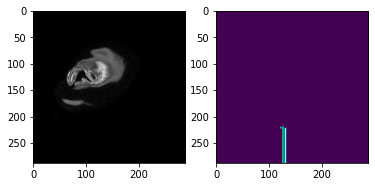

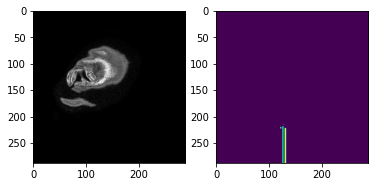

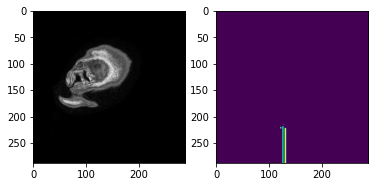

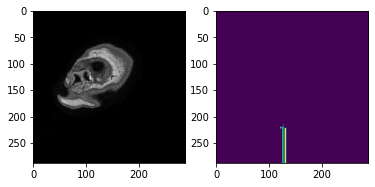

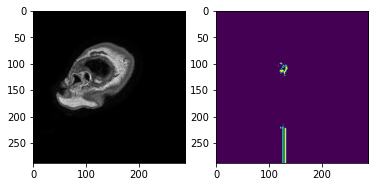

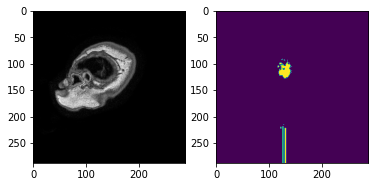

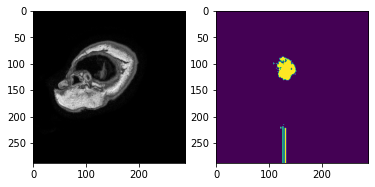

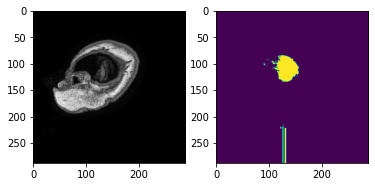

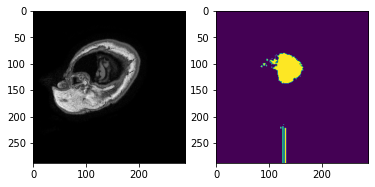

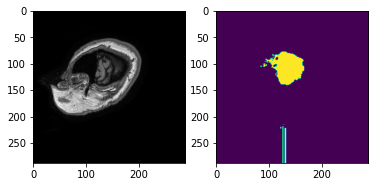

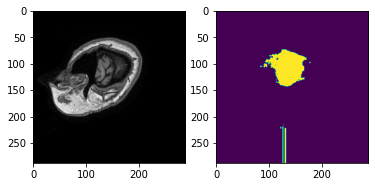

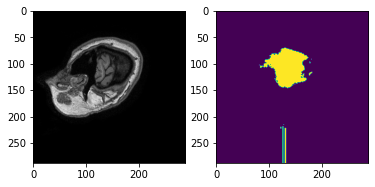

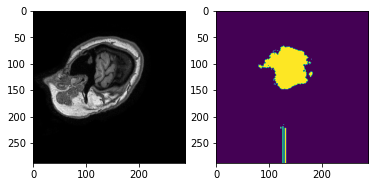

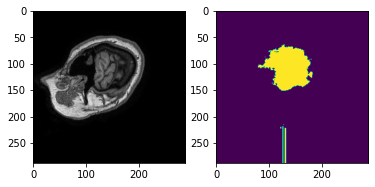

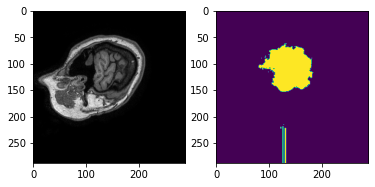

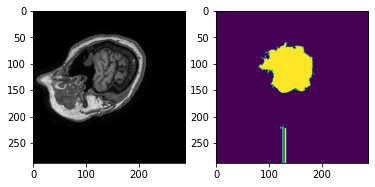

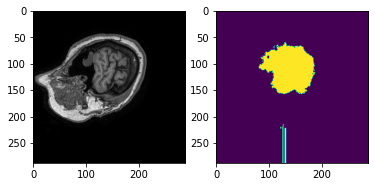

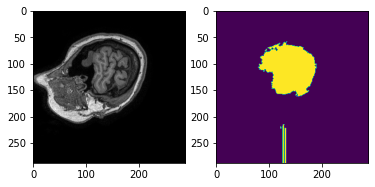

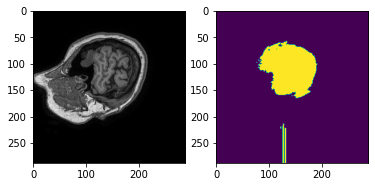

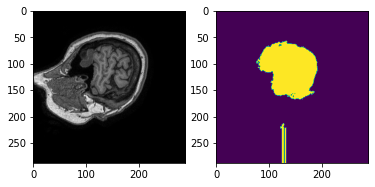

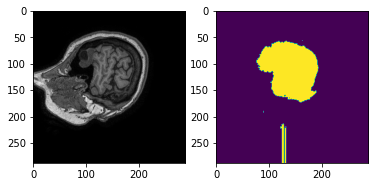

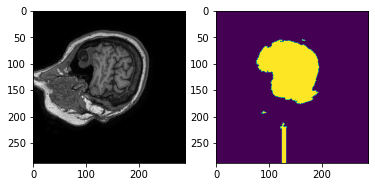

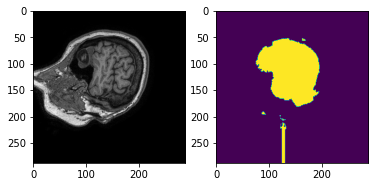

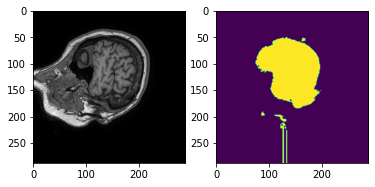

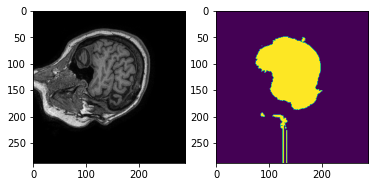

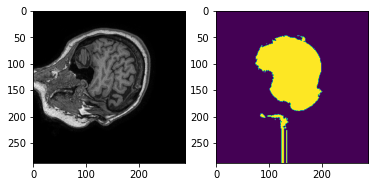

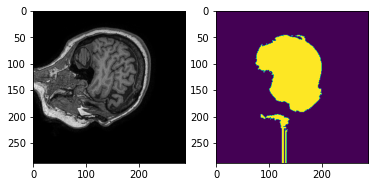

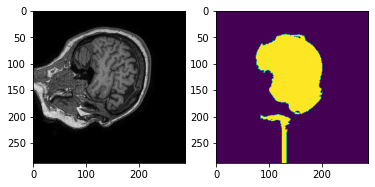

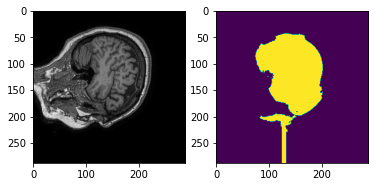

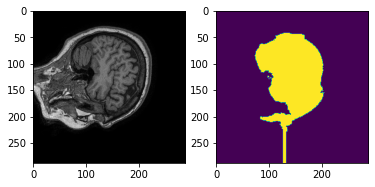

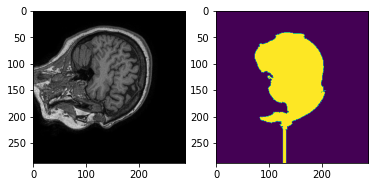

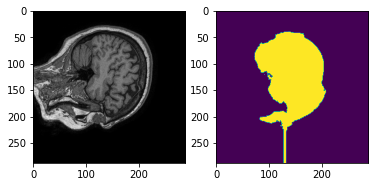

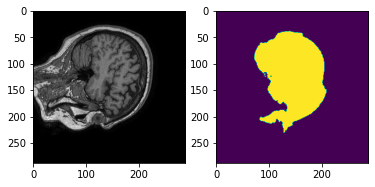

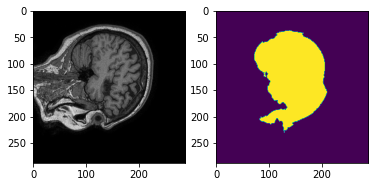

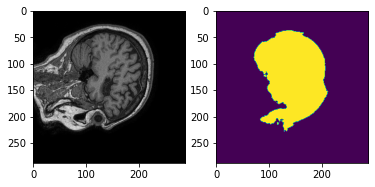

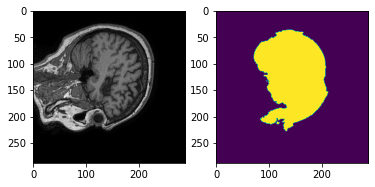

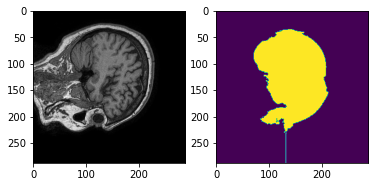

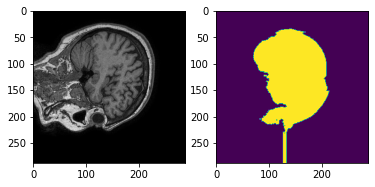

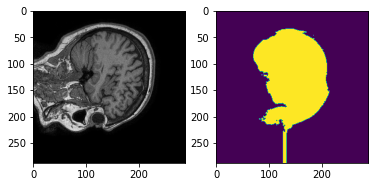

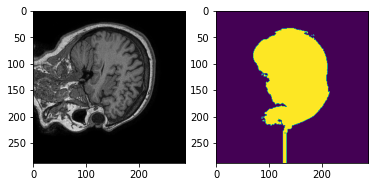

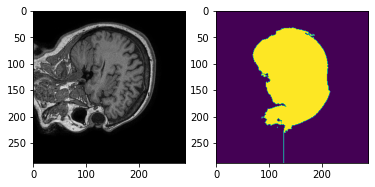

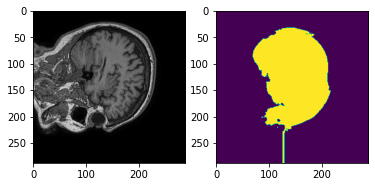

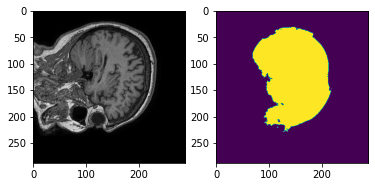

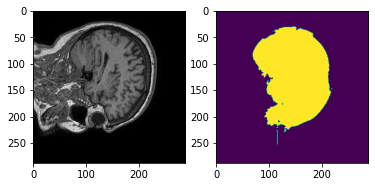

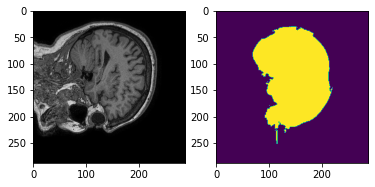

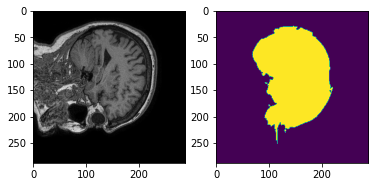

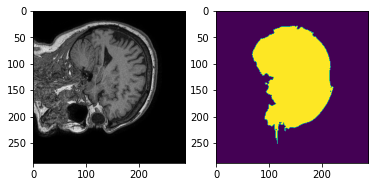

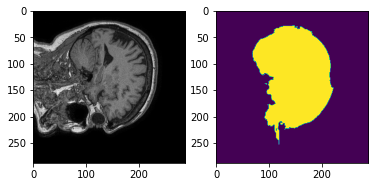

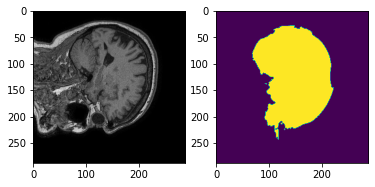

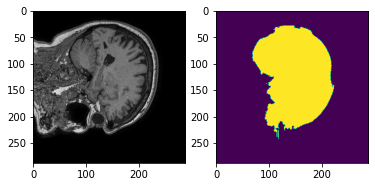

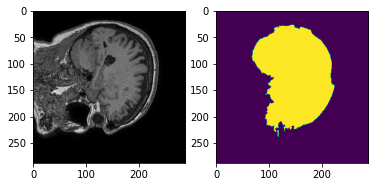

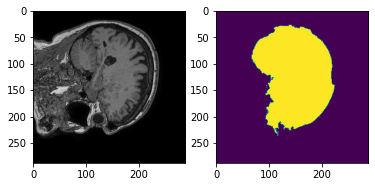

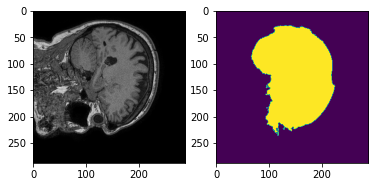

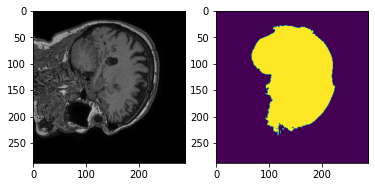

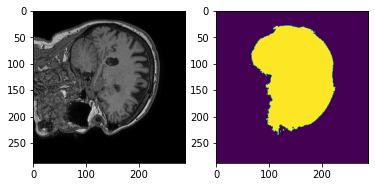

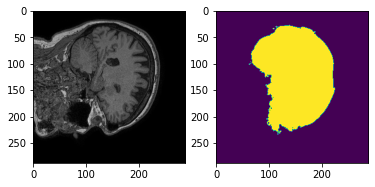

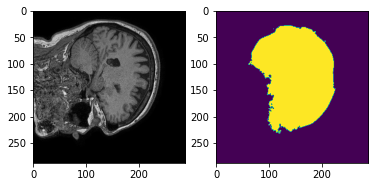

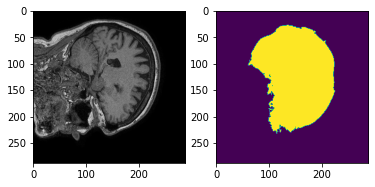

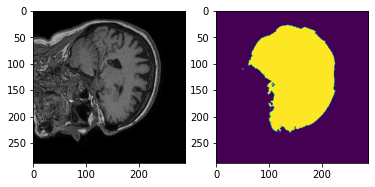

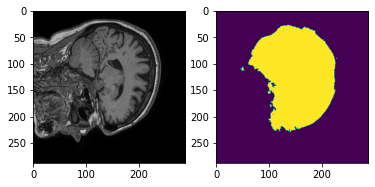

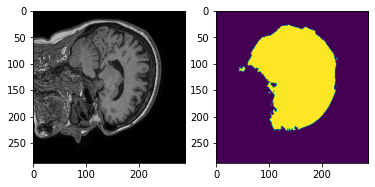

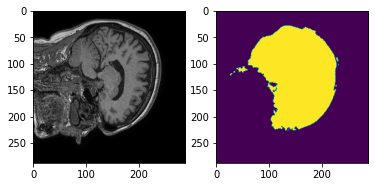

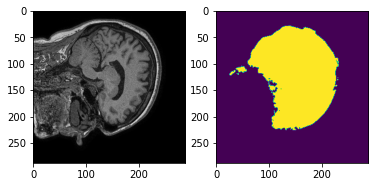

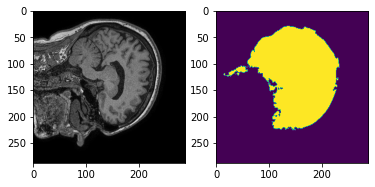

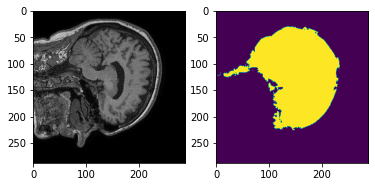

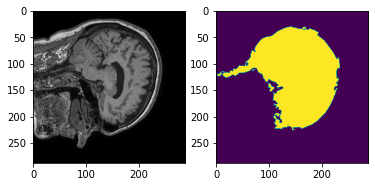

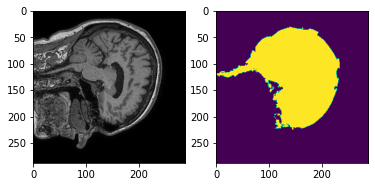

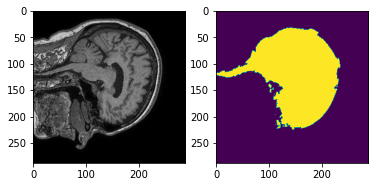

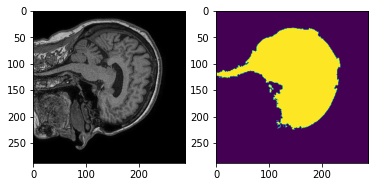

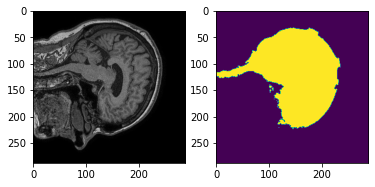

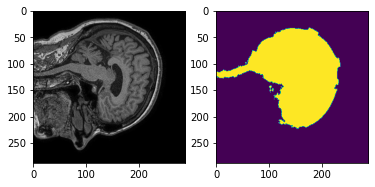

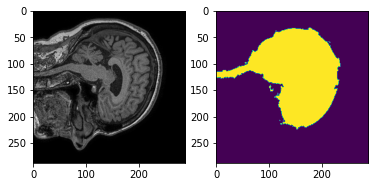

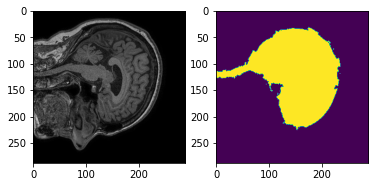

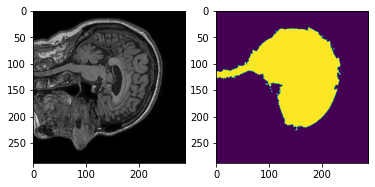

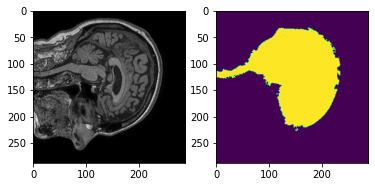

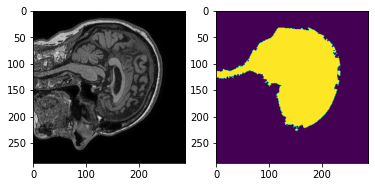

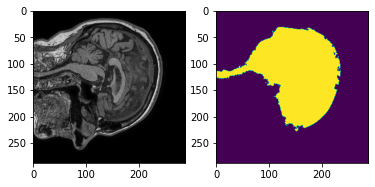

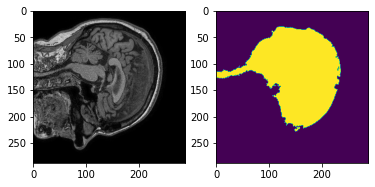

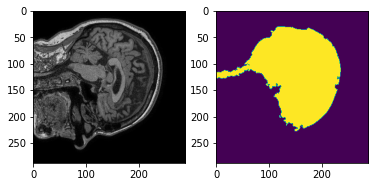

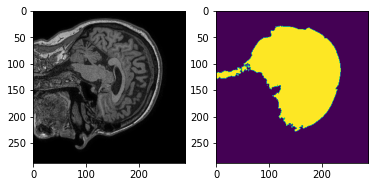

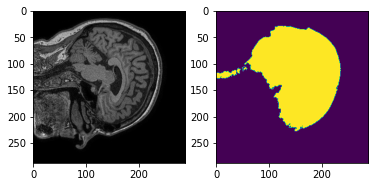

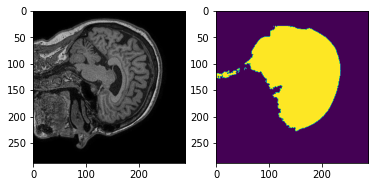

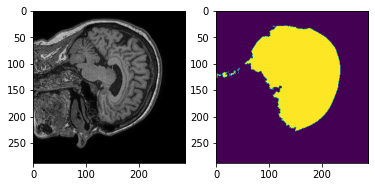

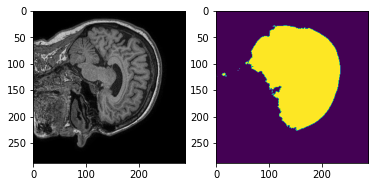

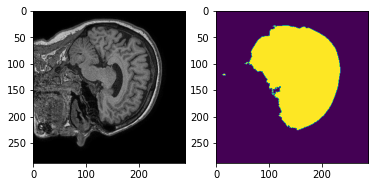

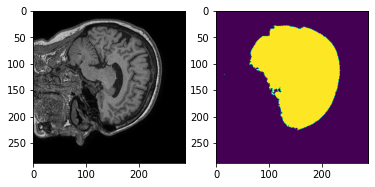

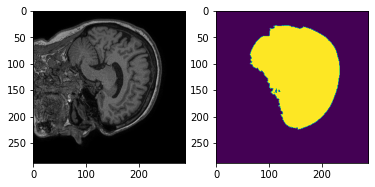

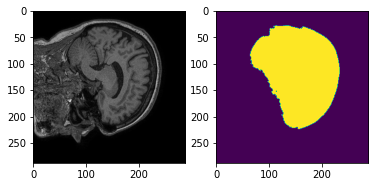

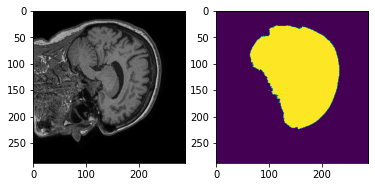

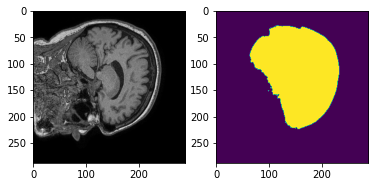

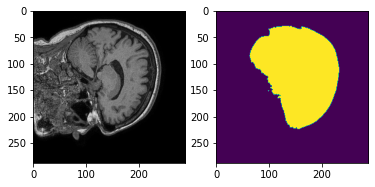

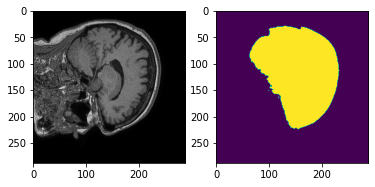

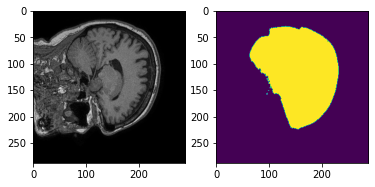

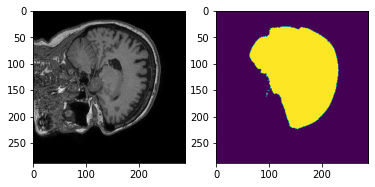

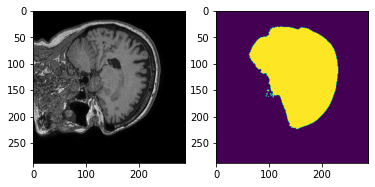

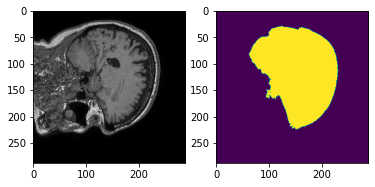

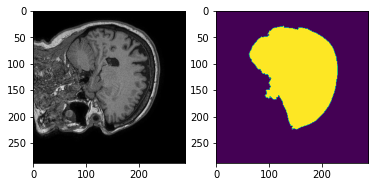

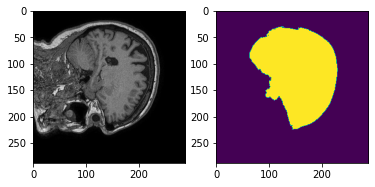

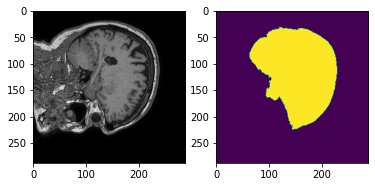

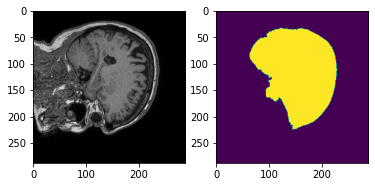

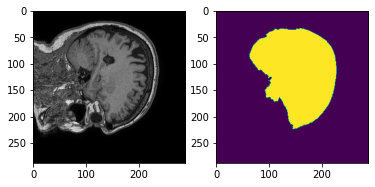

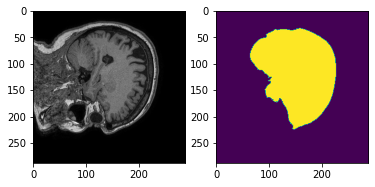

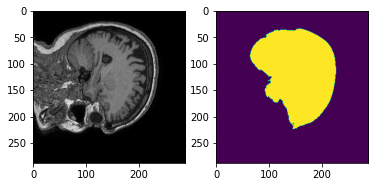

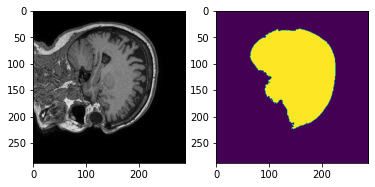

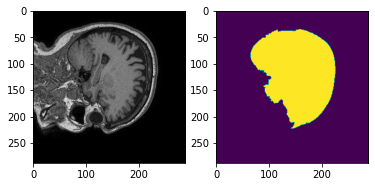

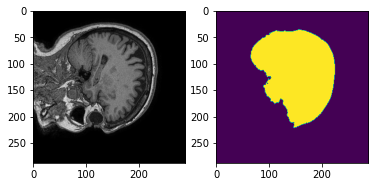

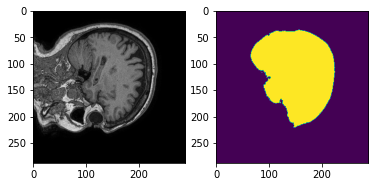

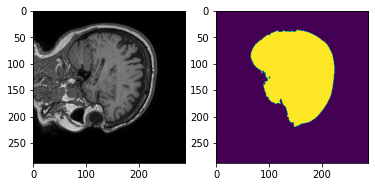

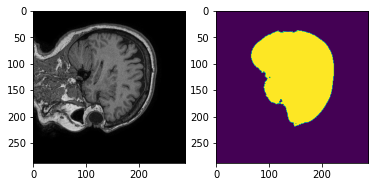

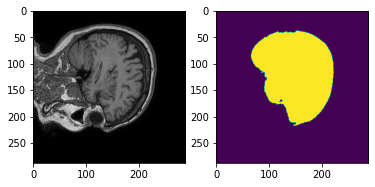

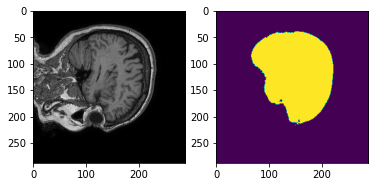

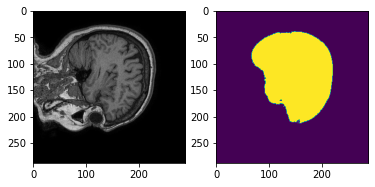

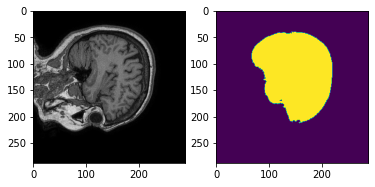

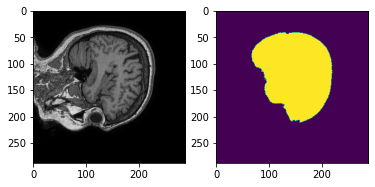

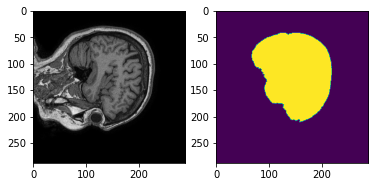

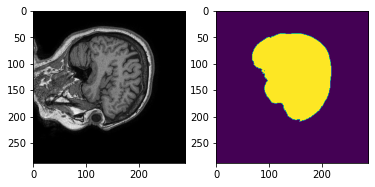

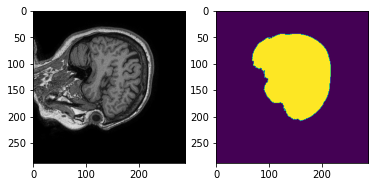

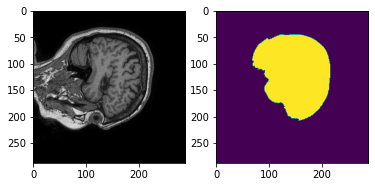

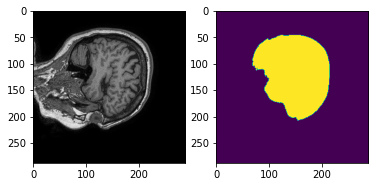

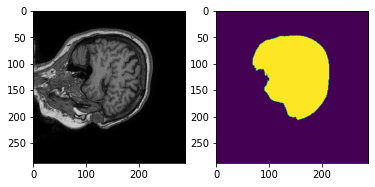

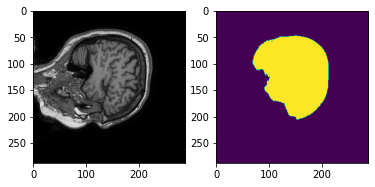

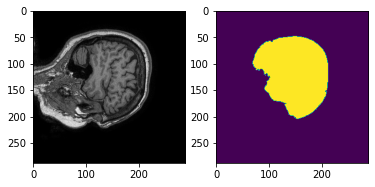

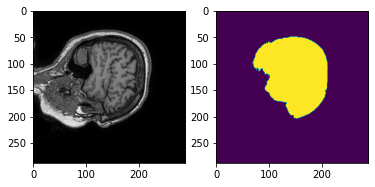

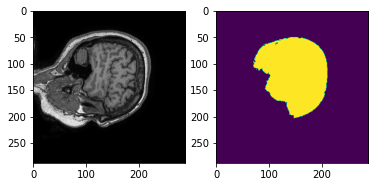

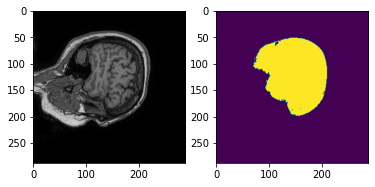

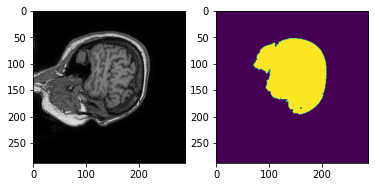

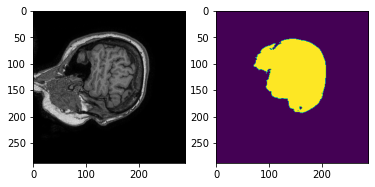

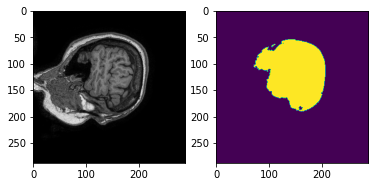

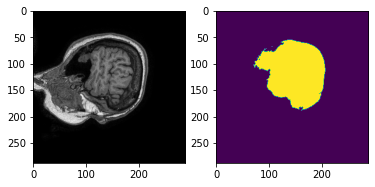

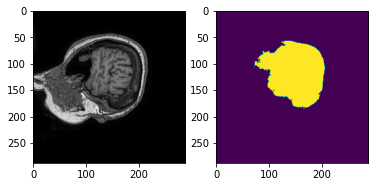

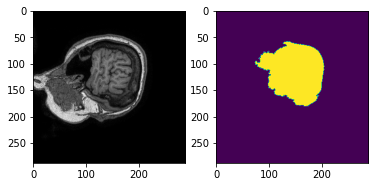

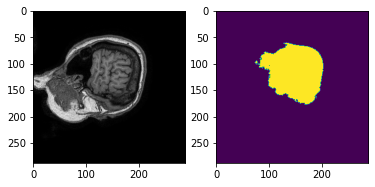

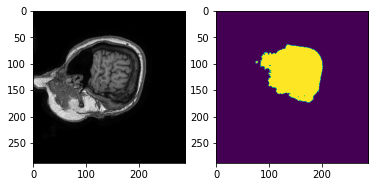

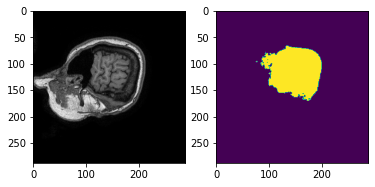

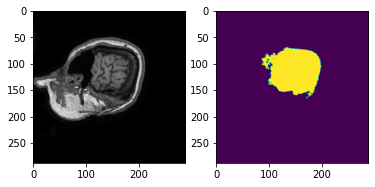

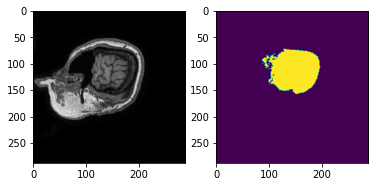

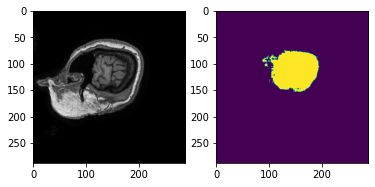

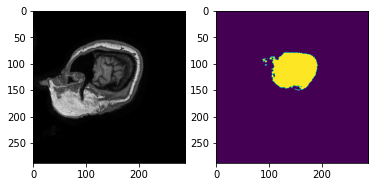

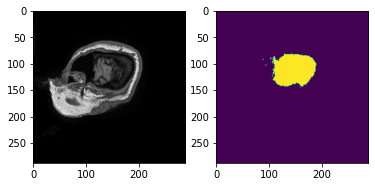

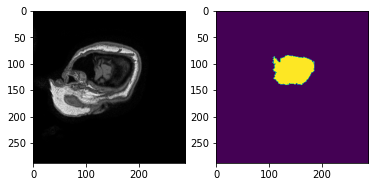

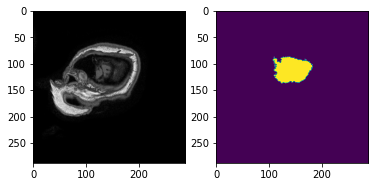

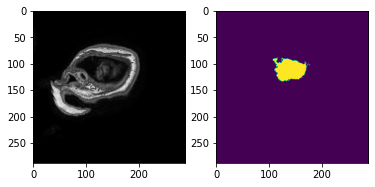

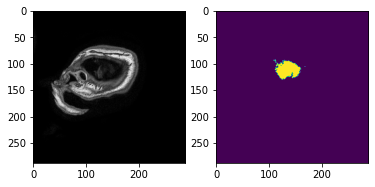

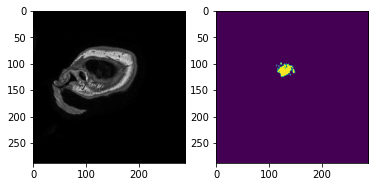

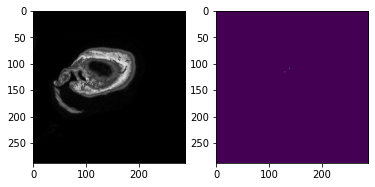

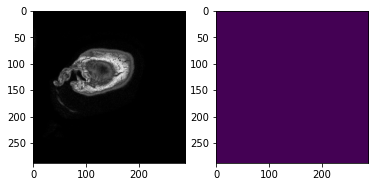

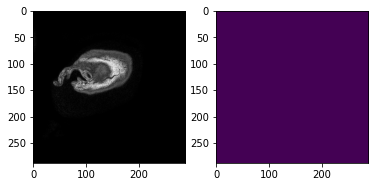

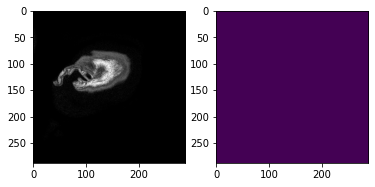

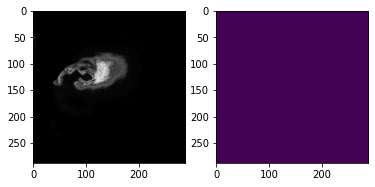

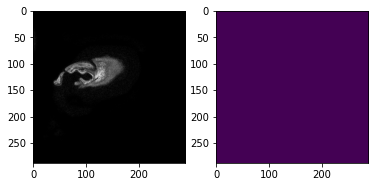

In [6]:
seg = (seg == seg[seg.shape[0]//2,seg.shape[1]//2,seg.shape[2]//2])
print(seg.dtype)
for ii in range(data.shape[0]):
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow( data[ii], cmap = "gray")
  plt.subplot(1,2,2)
  plt.imshow(seg[ii])
  plt.show()